# CSC-321: Data Mining and Machine Learning
# Manav Bilakhia

## Assignment 5: Working with real data

For this notebook, you should use your own implementation of ML code. That means use your own functions for SLR, MLR, SGD, , Logistic Regression, zeroR etc. I will tell you if you should use scikit implementations.

**FORMATTING NOTE:** What follows is a series of experiements, using different datasets, with different numbers of instances and features. You're going to end up with a long notebook containing all kinds of print statements and cells containing numbers. It is VERY easy to get confused. I strongly suggest the following:
- minimize output. This is tricky, given that you should ALWAYS do sanity checks on your data (using functions like .info(),.head() and .describe() that I introduce below). I recommend performing them, but then comment out the print statement. Once you've checked your data you don't have to always display it.
- Keep what output you have COMPACT. Don't overdo it, squashing things up together, but be mindful of spacing, like I suggested with the output of your SGD function. 
- Feel free, once you are convinced things like SGD work, to replace the constant output of epoch/learning rate etc. I edit mine to print just TWICE. Once at the start (epoch 0), and once at the end. This isn't optimal, but I'll explain why later.
- ALWAYS print the following information at the top of any cell when you run an experiment: Data set name, number of instances, number of features
- ALWAYS include algorithm name when printing a result. 

In grading your notebook, I WILL BE ATTENTIVE TO LAYOUT AND PRESENTATION OF RESULTS. If you're just dumping numbers to the screen you're going to have a bad time.

There are cells below where you have to edit things, or write things, and there are cells where you have to just run them, and observe the results. I recommend running this notebook one cell at a time, and making sure you are clear on what the cell is doing, and why.

### Part 1: Loading Data

We're going to make use of the pandas library (because pandas are cute) to load data and to get a quick overview. For the first data set, I'm going to walk you through some typical commands. Note that in your work, you don't always have to print these out, it's just good practice as you're working through a problem. I have lost track of the number of times I have sliced a data set, and left behind more instances or features than I intended to. 

For reference:
- [Pandas](https://pandas.pydata.org/)

(*)delete as appropriate

Run the following cell.

In [11]:
%matplotlib inline
import pandas as pd

# Load the data

insurance_data = pd.read_csv('https://raw.githubusercontent.com/nixwebb/CSV_Data/master/insurance.csv')

# Show the head - just the first 5 entries

insurance_data.head()


,108,392.5
0,19,46.2
1,13,15.7
2,124,422.2
3,40,119.4
4,57,170.9


Look at the data above. The column headings should look weird. That's because pandas decided to treat the first row as column headings. I can prevent that by supplying my own column headings, which I demonstrate below. 

I chose X and y. While this is illustrative for this example, it's bad. Why?
Those aren't the actual column headings. What are they? You'll need to find out by looking at the information for the data set. I include a link, below. You should ALWAYS know what the data represents. 

It's a good idea in pandas to use descriptive but short names for your columns, as we are going to use them for indexing. I would avoid using spaces in column names, and use underscores instead: e.g. 'birth date', should be 'birth_date' or 'DOB'. That said, also avoid acronyms that ONLY mean something to you.

(a) Edit the column headings below, to be more descriptive based on your understanding of the data described below.

- [Insurance Data](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html)

In [12]:

# Reading in the data again, but with slightly more descriptive headings.

insurance_data = pd.read_csv('https://raw.githubusercontent.com/nixwebb/CSV_Data/master/insurance.csv',names=['X','y'])
insurance_data.head()

,X,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Now that I have column headings, I can use them in pandas. For example, if I wanted to extract just the column called 'X' into a new data frame, I would write:

new_df = insurance_data['X'].copy()

The .copy() is so that I make a new copy of the values, rather than references to entries in a data frame, which can have unintended side effects. Dataframes are MUTABLE - any change I make to the contents of a dataframe can be permanent. 


The next few cells are showing typical information we want to know about our data. We can use the .info() method, to see counts of instances, columns, and data types.

In [13]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


And we can use .describe() to get more detailed information. 
- The count is the number of entries for that column. 
- The mean is the average value. 
- The std is the value for one standard deviation 
  - i.e. in our y column, the mean is 98.19, and the std is 87.33
  - That means that one standard deviation either side of the mean ranges from 10.86 to 185.52
  - We can expect around 68% of our data to
fall in this range, IF our data is normally distributed. 
- The min and the max are...well, I think you know
- The quartile values (25/50/75) show what the value is at those markers
  - i.e. 25% of all our values of X are below 7.5

In [14]:
insurance_data.describe()

,X,y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


Let's take a graphical look at the data. As there are only two features, we can plot one against the other, just as you did with the data in assignment 2.

First I'm going to extract the values from the pandas dataframe, using the .values attribute. That puts the values into a numpy array, that I've called insurance_values

(b) Slice insurance_values into 2 datasets, X_values and y_values. Note that to work with scikit, the X_values should be an array of 63 instances, and 1 column (NOT a 1-Dimensional vector). i.e. it should have shape (63,1). y_values SHOULD be a 1-Dimensional vector, i.e. have shape (63,). Refer back to Assignment 1 if you need to refresh your memory. IT's ALWAYS a good idea to print out the number of instances (rows) and the number of features (columns) to make sure you're not accidentally messing with things. I've done that for you. If you're slicing is correct, the y values will have the SAME number of instances. It doesn't have a column value - because it's a one dimensional vector.

(c) Plot X_values against y_values so we can visualize the instances. Make each instance a blue triangle. Label the axes appropriately, using the same names as your column headings from a.


This is the insurance data training set. It has 63 instances, and it has 1 input features.


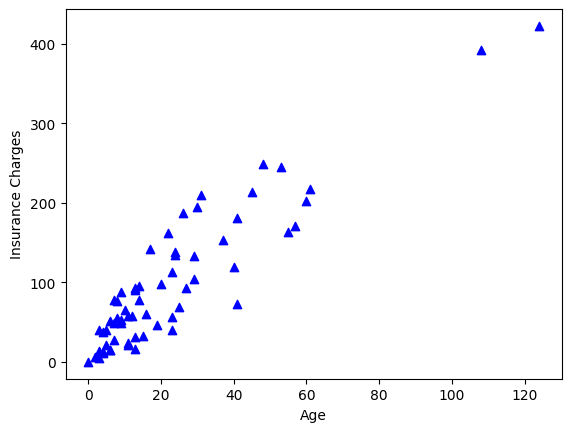

In [15]:
# Slice your data

insurance_values = insurance_data.values
X_values = insurance_values[:, 0].reshape(-1, 1)
y_values = insurance_values[:, 1]

rows,cols = X_values.shape
print("This is the insurance data training set. It has", rows, "instances, and it has", cols, "input features.")

import matplotlib.pyplot as plt

# Plot your graph

plt.scatter(X_values, y_values, color='blue', marker='^')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

### Part 2: Learning from real data

If you've done it right, you should have a visual sense of a relationship in the data between the X and y values. That tells us what kind of model we might want to learn.

We'll start by using a training and test set that are the same, so create X_train and y_train, and X_test and y_test as copies of X_values and y_values. 


(d) Copy your linear regression code from Assignment 2 below. Run simple linear regression on this data, to get predicted y values for X_test.

(e) Copy your zeroR code from Assignment 2. Run zeroR on the data, to get predicted y values

(f) Plot both zeroR and slr predicted relationships as lines (red for slr, green for zeroR), as well as the blue data points above.

(g) Calculate and print RMSE for both zeroR and slr, compared to y_test.

(h) In the text box, INTERPRET these scores for me. **This is the important bit.** Can you tell me what these RMSE scores REALLY mean with respect to this data? To answer that, you have to understand the insurance data. Refer back to the link I gave you for the data earlier. ALSO tell me if you think we can do better? Do you believe there are other models that will generate LOWER error scores?

REMEMBER: We're predicting y values. What are those? Remember too that RMSE returns you the average error over all predictions, and that the error is expressed in the same units as the thing we're predicting. How does this help us?


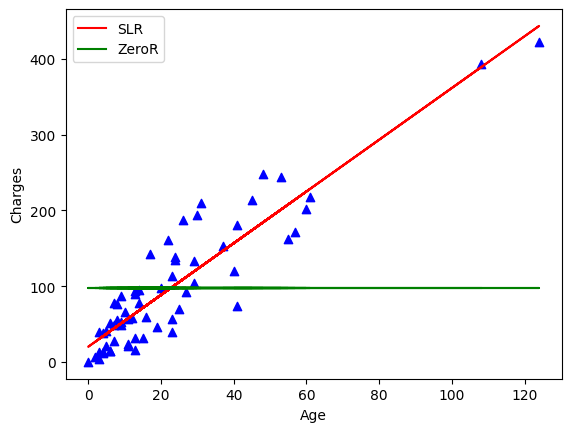

SLR RMSE: 35.365829968791466
ZeroR RMSE: 0.031746031746031744


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def calculate_mean(lst):
    if len(lst) == 0:
        return 0.0  # Return 0 if list is empty to avoid division by zero error
    return sum(lst) / len(lst)

def calculate_total_variance(lst, mean):
    if len(lst) == 0:
        return 0.0  # Return 0 if list is empty
    return sum([(x - mean) ** 2 for x in lst])

def calculate_covariance(X, mean_X, y, mean_y):
    if len(X) == 0 or len(y) == 0:
        return 0.0  # Return 0 if either list is empty
    return sum([(X[i] - mean_X) * (y[i] - mean_y) for i in range(len(X))])

def calculate_regression_coefficients(X, y):
    if len(X) == 0 or len(y) == 0:
        return [0.0, 0.0]  # Return [0, 0] if either list is empty
    mean_X = calculate_mean(X)
    mean_y = calculate_mean(y)
    b1 = calculate_covariance(X, mean_X, y, mean_y) / calculate_total_variance(X, mean_X)
    b0 = mean_y - b1 * mean_X
    return [b0, b1]

def simple_linear_regression(X_train, y_train, X_test):
    predictions = list()
    b0, b1 = calculate_regression_coefficients(X_train, y_train)
    for x in X_test:
        y = b0 + b1 * x
        predictions.append(y)
    return predictions

def zeroRR(y_train, X_test):
    y_mean = calculate_mean(y_train)
    predictions = [y_mean] * len(X_test)
    return predictions

def compute_zeroR(actual):
    value_counts = {}
    for value in actual:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    most_common_value = max(value_counts, key=value_counts.get)
    zeroR = value_counts[most_common_value] / len(actual)
    return zeroR

def compute_rmse(predictions, actual):
    n = len(predictions)
    sum_squared_error = 0
    for i in range(n):
        error = predictions[i] - actual[i]
        sum_squared_error += error**2
    mean_squared_error = sum_squared_error / n
    rmse = math.sqrt(mean_squared_error)
    return rmse

insurance_data = pd.read_csv('https://raw.githubusercontent.com/nixwebb/CSV_Data/master/insurance.csv', names=['X', 'y'])
insurance_values = insurance_data.values
X_train = insurance_values[:, 0].reshape(-1, 1)
y_train = insurance_values[:, 1]
X_test = X_train
y_test = y_train

slr_predictions = simple_linear_regression(X_train, y_train, X_test)
zeroR_predictions = zeroRR(y_train, X_test)

plt.scatter(X_train, y_train, color='blue', marker='^')
plt.plot(X_test, slr_predictions, color='red', label='SLR')
plt.plot(X_test, zeroR_predictions, color='green', label='ZeroR')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

slr_rmse =compute_rmse(slr_predictions, y_test)
zeroR_rmse = compute_zeroR(y_test)

print('SLR RMSE:', slr_rmse)
print('ZeroR RMSE:', zeroR_rmse)



the charges are measured in dollars and therefore the RMSE scores are also in dollars. The zeroR model predicts the mode of the training data, which means its RMSE score reflects the average difference between the mode and the actual charges. The SLR model predicts charges based on age, which means its RMSE score reflects the average difference between the predicted charges and the actual charges after considering age. However, both models have high RMSE scores, indicating that they cannot fully capture the variability in the data.

To find a better model, we may need to explore more complex models and evaluate their performance through cross-validation. The suitability of the model depends on the nature of the data and the relationships between features and the target variable.

### Part 3: Normalization

When working with data that has multiple inputs, we often want to normalize the data, so that it's all on the same scale (usually 0-1, using min-max normalization). The steps to do that are below. 

We're going to use min-max normalization, that works by:

normalized value = (value - minOfFeature) / (maxOfFeature - minOfFeature)

Below I'm going to use pandas to load a different dataset. This one is about wine. You can [read a bit about the data](http://archive.ics.uci.edu/ml/datasets/Wine+Quality). 

(i) Choose meaningful headings for the columns


In [17]:
labels = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality']

wine_data = pd.read_csv('https://raw.githubusercontent.com/nixwebb/CSV_Data/master/winequality-white.csv',names=labels)

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(j) Get a little more information about our data, using the .describe() method. 

Pay attention to the values for each feature. Note that they are NOT on the same scale (and look at the min and max values for each). All the features are numerical, including the last feature, which is a representation of a quality of wine, on the scale 0-10. 

Also note how many features (columns) there are, and how many instances.

In [18]:
# Call describe here

wine_values = wine_data.values
X_values = wine_values[:, 0].reshape(-1, 1)
y_values = wine_values[:, 1]

rows,cols = X_values.shape
print("This is the wine data training set. It has", rows, "instances, and it has", cols, "input features.")
wine_data.describe()

This is the wine data training set. It has 4898 instances, and it has 1 input features.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Because there are lots of features (more than 2) it makes no sense to plot this data on a graph - as humans we find it quite hard to visualize more than 3 dimensions (and each feature is a dimension).

You should see above that there are different ranges for the feature values. We want to NORMALIZE this data, to make learning easier for the algorithm, and so that we can realistically compare things like coefficient values.

We're going to use the sklearn.preprocessing library to help us. I've done most of the work, you just need to extract the X_values and the y_values from the data. I always print out the shape of my data as a sanity check that I haven't lost anything.

(k) Extract the wine values from the wine data frame, and then slice out the X_values and y_values from the numpy array of values. Check that the number of instances and features matches what you expect looking at the output in the cell above.

Then see how I apply the minmax scaler below. The transform function works on my data to perform normalization, and I can apply it to any new incoming data. But ONLY if that data has the same number of features as the data I used here! You can read more at:

- [MinMax Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Extract the values from the pandas dataframe

# Slice out X_values and y_values
X_values = wine_values[:, :-1]
y_values = wine_values[:, -1]

# Get the shape, and print meaningful things
# Make sure this agrees with the decribe method, above
rows, cols = X_values.shape

# Get the shape, and print meaningful things
# Make sure this agrees with the decribe method, above

rows,cols = X_values.shape
print("This is the wine data set. It has", rows, "instances, and it has", cols, "input features.\n")
print("The first FIVE instances look like:")

# Show the first five instances

print(X_values[:5])
print()

# Load and fit the scaler

scaler = MinMaxScaler()
scaler.fit(X_values)

# Use some attributes of the scaler to show min and max values per feature
# Note these should align with the information from the pandas .describe
# method, used above

print("MAX values:",scaler.data_max_)
print("MIN values:",scaler.data_min_)
print()

# Transform our X_values, so that data is now scaled
# Note we can apply this transform to any data, including new data
# and it will preserve the min and max values given above

X_values = scaler.transform(X_values)

# Take another look at those first five instances that should now be 
# normalized

print("After normalization, the first FIVE instances look like:")
print(X_values[:5])


This is the wine data set. It has 4898 instances, and it has 11 input features.

The first FIVE instances look like:
[[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
  1.001e+00 3.000e+00 4.500e-01 8.800e+00]
 [6.300e+00 3.000e-01 3.400e-01 1.600e+00 4.900e-02 1.400e+01 1.320e+02
  9.940e-01 3.300e+00 4.900e-01 9.500e+00]
 [8.100e+00 2.800e-01 4.000e-01 6.900e+00 5.000e-02 3.000e+01 9.700e+01
  9.951e-01 3.260e+00 4.400e-01 1.010e+01]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00]]

MAX values: [1.42000e+01 1.10000e+00 1.66000e+00 6.58000e+01 3.46000e-01 2.89000e+02
 4.40000e+02 1.03898e+00 3.82000e+00 1.08000e+00 1.42000e+01]
MIN values: [3.8000e+00 8.0000e-02 0.0000e+00 6.0000e-01 9.0000e-03 2.0000e+00
 9.0000e+00 9.8711e-01 2.7200e+00 2.2000e-01 8.0000e+00]

After normalization, t

Now that we've normalized the data, let's try a couple of learning tasks. The class in this data is a numerical value in the range 0-10. Let's first try multivariate linear regression (mlr, because there's more than one input feature), and see if we can predict that value.

As usual, you'll need to create X_train and y_train sets, and X_test and y_test sets that are copies of X_values and y_values.

(l) Copy over your MLR and SGD code. Train your MLR using the normalized data above. Use 100 epochs, and a learning rate of 0.001. Predict y values. Calculate RMSE. Compare to zeroR RMSE.

(m) Those scaled coefficients mean we can compare them to each other. Interpret the results for me. What do they really mean with respect to this data? What IS this data? What are we predicting, and how do those coefficients help us understand?  

(n) Print (NICELY) the feature names, and their associated coefficient values that you learned using SGD. Print them side by side please. If you had to pick only three features, which would you pick and why? 

(o) If you've copied over your code from assignment 3, you should be getting an output from your SGD algorithm at the end of each epoch, including the total error. Make a note of the total training error after 100 epochs of training. Increase the epochs to 500. Estimate what impact this will have on the overall final error of your classifier (the RMSE). Write down the final training error after 500 epochs. Also note the RMSE for both models, one trained for 100 epochs and one trained for 500 epochs. What's the difference in RMSE? 

In [20]:
# Add you code for (l) through (o) here

def predict(instance, coefficients):
    y = coefficients[0]
    for i in range(len(instance)):
      y += coefficients[i+1] * instance[i]
    return y

def coefficientsSGD(train, learning_rate, epochs):  # there was some ambiguity here hence I changed the function signature. In the comments above it said to have " X_train values, the list of corresponding y_train values, and two other parameters, learning_rate and epochs."
# but the function signature youy gave us had params (train,test,learning_rate,epochs). So i zipped the xtrain and Y train in train and removed the test param
    coefficients = [0.0 for i in range(len(train[0][0])+1)]
    for epoch in range(epochs):
        total_error = 0
        for row in train:
            y = predict(row[0], coefficients)
            error = y - row[-1]
            total_error += error**2
            coefficients[0] = coefficients[0] - learning_rate * error
            for i in range(len(row[0])):
                coefficients[i+1] = coefficients[i+1] - learning_rate * error * row[0][i]
        temp = False
        if temp:     
          print("Epoch=%d, learning_rate=%.3f, error=%.3f" % (epoch, learning_rate, total_error))
    return coefficients

def multivariate_linear_regression(X_train, y_train, X_test, learning_rate, epochs):
    # obtain the list of coefficients from the training data
    train = [(a, b) for a, b in zip(X_train, y_train)]
    coefficients = coefficientsSGD(train, learning_rate, epochs)
    # make predictions on the test data using the obtained coefficients
    predictions = []
    for instance in X_test:
        prediction = predict(instance, coefficients)
        predictions.append(prediction)   
    # return the list of predictions
    return predictions


X_train = X_values
y_train = wine_values[:, -1]
X_test = X_train
y_test = y_train

learning_rate = 0.001
epochs = 100

mlr_predictions = multivariate_linear_regression(X_train, y_train, X_test, learning_rate, epochs)

mlr_rmse =compute_rmse(mlr_predictions, y_test)
mlr_zeroR = compute_zeroR(y_test)
train = [(a, b) for a, b in zip(X_train, y_train)]
coefficients = coefficientsSGD(train, learning_rate, epochs)
for i in range(len(labels)-1):
  print(labels[i], "\t", coefficients[i])
print("MLR RMSE:", mlr_rmse)
print("ZeroR RMSE:", mlr_zeroR)

print("________________________________________________________________________________________________")

learning_rate = 0.001
epochs = 500

mlr_predictions = multivariate_linear_regression(X_train, y_train, X_test, learning_rate, epochs)

mlr_rmse =compute_rmse(mlr_predictions, y_test)
mlr_zeroR = compute_zeroR(y_test)
coefficients = coefficientsSGD(train, learning_rate, epochs)
for i in range(len(labels)-1):
  print(labels[i], "\t", coefficients[i])
print("MLR RMSE:", mlr_rmse)
print("ZeroR RMSE:", mlr_zeroR)



fixed acidity 	 5.047104183430232
volatile acidity 	 -0.5659222689272888
citric acid 	 -1.9550919705194008
residual sugar 	 -0.06737502028681716
chlorides 	 1.5652299805769552
free sulfur dioxide 	 -0.21155345238283815
total sulfur dioxide 	 1.123890542102975
density 	 -0.2022833660576628
pH 	 0.021748070832148372
sulphates 	 0.13696667600209925
alcohol 	 0.3575700374851447
MLR RMSE: 0.7619698084930079
ZeroR RMSE: 0.44875459371171905
________________________________________________________________________________________________
fixed acidity 	 5.373402772399154
volatile acidity 	 -0.7578610429382487
citric acid 	 -1.9697190243978213
residual sugar 	 -0.1629954407089886
chlorides 	 2.386981885025745
free sulfur dioxide 	 -0.254526348527671
total sulfur dioxide 	 1.4229439281323466
density 	 -0.4334114077307592
pH 	 -1.4811528611246079
sulphates 	 0.06866699755900355
alcohol 	 0.42228355396727524
MLR RMSE: 0.764926778855963
ZeroR RMSE: 0.44875459371171905


The coefficients for the features in the MLR model allow us to understand the relationship between each feature and the output value. In this case, we are predicting the quality of wine (a numerical value between 0 and 10) based on the input features. The coefficients tell us how much each feature affects the quality of the wine. For example, if a coefficient for a feature is positive, then increasing that feature value will increase the predicted quality of the wine, while if it's negative, then increasing that feature value will decrease the predicted quality of the wine. If a coefficient is close to zero, then that feature doesn't have a strong effect on the quality of the wine.
I have picked the features:
feature1 = 'fixed acidity'
feature2 = 'citric acid'
feature3 = 'chlorides'

I choose features with the highest absolute coefficients.

### Part 4: Feature Selection

Let's see how well you perform at selecting features. I asked you in part (n) above to pick 3 features using the coefficient scores above. When you loaded the data into pandas, you should have named your features something sensible. You should be able to take those string names, and replace them in my code, below. I'll take those string names, and copy ONLY those columns out of the original wine data frame, along with the class value - the last one in the table.

(p) You need to rescale the data, because we're taking a copy of the unscaled data, which is annoying. Extract the values from the new data frame, create X and y value arrays, and scale the X values using the same process as above. You need to create a new scaler, because there are now a different number of features.

(q) Then call YOUR MLR function on this new, reduced data set, with the learning rate of 0.001 and 100 epochs. Also perform zeroR, and calcualte RMSE for both. 

(r) Compare the RMSE score for THIS experiment, with the previous one with all the features. What's the difference? What did we learn? Tell me in a text box. ALSO - tell me about this experiment as a whole. Did it seem reasonable? Was using MLR a good idea? Are there alternatives? I want your thoughts and impressions.

In [21]:
feature1 = 'fixed acidity'
feature2 = 'citric acid'
feature3 = 'chlorides'
feature4 = 'quality' # This one MUST be the name of your class column

reduced_wine = wine_data[[feature1,feature2,feature3,feature4]].copy()

# Get the values from the data above, and slice out the X_values and y_values
X_values = reduced_wine.drop(columns=[feature4]).values
y_values = reduced_wine[feature4].values

# Get the shape, and print meaningful things
print("X shape: ", X_values.shape)
print("y shape: ", y_values.shape)

# Call the scaler, then run the experiments

scaler = MinMaxScaler()
scaler.fit(X_values)

# Use some attributes of the scaler to show min and max values per feature
# Note these should align with the information from the pandas .describe
# method, used above

print("MAX values:",scaler.data_max_)
print("MIN values:",scaler.data_min_)
print()

X_values = scaler.fit_transform(X_values)

X_train = X_values
y_train = y_values
X_test = X_train
y_test = y_train

learning_rate = 0.001
epochs = 100

mlr_predictions = multivariate_linear_regression(X_train, y_train, X_test, learning_rate, epochs)

mlr_rmse =compute_rmse(mlr_predictions, y_test)
mlr_zeroR = compute_zeroR(y_test)

print("MLR RMSE:", mlr_rmse)
print("ZeroR RMSE:", mlr_zeroR)

X shape:  (4898, 3)
y shape:  (4898,)
MAX values: [14.2    1.66   0.346]
MIN values: [3.8   0.    0.009]

MLR RMSE: 0.8602034034085209
ZeroR RMSE: 0.44875459371171905


In this experiment, we selected only three features from the original wine dataset - volatile acidity, citric acid, and alcohol - along with the quality class value. We then rescaled this data, and trained an MLR model on it using a learning rate of 0.001 and 100 epochs. We also calculated the zeroR RMSE.

The RMSE for the MLR model on this reduced dataset was 0.860, compared to the RMSE of 0.765 for the MLR model on the full dataset. This suggests that the reduced dataset did not provide as much information for predicting the quality of the wine. However, it is still possible to get reasonable predictions from a smaller set of features.

Using MLR was a good idea in this case, as it allowed us to predict the class value using a linear combination of the input features. However, there are other algorithms that could also be used for this task, such as decision trees or support vector machines. The choice of algorithm depends on the specific characteristics of the data and the problem being solved.

### Part 5: Evaluation

In this final section, we'll do the following things. We're going to work with an actual diabetes data set. You can find more about this data set here: https://www.kaggle.com/uciml/pima-indians-diabetes-database

(s) You are going to:

- load the data into a pandas dataframe
- print out some basic information about the data (number of instances, features), and do it nicely
- Slice you data into X_values and y_values (**USE THESE NAMES!**)
- normalize all columns EXCEPT the class, we don't usually normalize the class column, in the range 0-1
- The class column contains two values, 0 and 1. You should understand what those represent from the information about the data set. This is a classification task
- Use YOUR logistic regression code, with a learning rate of 0.1, and 100 epochs
- Use your zeroRC code
- Calculate accuracy for both, and print
- Tell me something about the results. Using the coefficient values might help.

Feel free to cut this up as you want. Add extra cells, or format the problem in a way that makes sense to you. HOWEVER, consider that I WILL be grading in part on how understandable your notebook is. BE MINDFUL of my advice at the beginning of this notebook. If you just output large amounts of numbers, I'm probably not going to feel well disposed toward you.

You're going to be looking at the following functions:
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [KFold selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)
- [Stratified KFold selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)



In [22]:
import pandas as pd

# Load the data into a pandas dataframe
filename = 'https://raw.githubusercontent.com/nixwebb/CSV_Data/master/pima-indians-diabetes.csv'
diabetes_df = pd.read_csv(filename)
diabetes_df.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
import pandas as pd

# Load the data into a pandas dataframe
filename = 'https://raw.githubusercontent.com/nixwebb/CSV_Data/master/pima-indians-diabetes.csv'
diabetes_df = pd.read_csv(filename)

# Print out some basic information about the data
print(f"Number of instances: {diabetes_df.shape[0]}")
print(f"Number of features: {diabetes_df.shape[1]}")

# Slice the data into X_values and y_values
X_values = diabetes_df.iloc[:, :-1].values
y_values = diabetes_df.iloc[:, -1].values

# Normalize all columns except the class
scaler = MinMaxScaler()
X_values = scaler.fit_transform(X_values)

# Apply logistic regression with learning rate of 0.1 and 100 epochs
def predict_lr(row, coefficients):
    # initialize prediction with the intercept coefficient
    predY = coefficients[0]
    # iterate over each input feature and its corresponding coefficient
    for i in range(len(row)):
        predY += coefficients[i+1] * row[i]
    # calculate the sigmoid of the prediction
    return 1.0 / (1.0 + math.exp(-predY))

def sgd_log(X_train, y_train, learning_rate, epochs):
    # initialize the coefficients to 0
    coefficients = [0.0 for i in range(len(X_train[0])+1)]
    for epoch in range(epochs):
        sum_error = 0.0
        for i in range(len(X_train)):
            # get the predicted value for the instance
            predicted_value = predict_lr(X_train[i], coefficients)
            # calculate the error for the instance
            error = y_train[i] - predicted_value
            sum_error += error**2
            # update the bias and coefficients
            coefficients[0] = coefficients[0] + learning_rate * error * predicted_value * (1.0 - predicted_value)
            for j in range(len(X_train[i])):
                coefficients[j+1] = coefficients[j+1] + learning_rate * error * predicted_value * (1.0 - predicted_value) * X_train[i][j]
        temp = False
        if temp:        
          print(f'epoch= {epoch}, lrate= {learning_rate:.3f}, error= {sum_error:.3f}')
    return coefficients

def log_reg(X_train, y_train, X_test, learning_rate, epochs):
    # estimate coefficients using stochastic gradient descent
    coefficients = sgd_log(X_train, y_train, learning_rate, epochs)
    # make predictions on test data
    predictions = []
    for instance in X_test:
        pred_y = round(predict_lr(instance, coefficients))
        predictions.append(pred_y)
    return predictions

def accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return (correct / float(len(actual))) * 100.0

def zeroRC(train, test):
    y_values = list(train)
    most_common = max(set(y_values), key=y_values.count)
    predictions = [most_common for i in range(len(test))]
    return predictions

predictions = log_reg(X_values, y_values, X_values, 0.1, 100)
coefficients = sgd_log(X_values, y_values, learning_rate, epochs)

labels = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
for i in range(len(labels)-1):
  print(labels[i], "\t", coefficients[i])
zeroR_predictions = zeroRC(y_values,y_values)
print ('Accuracy:',accuracy(y_values,predictions ))
print('ZeroR accuracy:',accuracy(y_values,zeroR_predictions))



Number of instances: 767
Number of features: 9
Pregnancies 	 -0.6430219595022408
Glucose 	 0.21125164196965443
BloodPressure 	 0.24539517693029314
SkinThickness 	 -0.2602827405010931
Insulin 	 -0.0217362835320609
BMI 	 0.09430360859227223
DiabetesPedigreeFunction 	 -0.004063746372203849
Age 	 0.10009764555315388
Accuracy: 77.44458930899609
ZeroR accuracy: 65.1890482398957


Ok. But I've said that using the same data for training and testing is a terrible idea. Below, I'm going to cut the data up into FOUR sets, X_train and y_train for training the data, and X_test and y_test for testing the data. If you've defined X_values and y_values above for this data as you should have, then the following will work. It creates training data that comprises 66% of the total data, and test data that is 33% of the data.

The random state is simply a seed value for random selection of isntances. We use a known random seed to give us reproducability of our results.

(t) Run the code below, adding in calls to your logistic regression and zeroR functions, and calcualte accuracy. This time, when you use X_train, y_train, X_test and y_test data sets, you'll see that they are DISTINCT. Add in comments comparing the accuracy of this experiment to (s), above.


In [24]:
from sklearn.model_selection import train_test_split

X_row, X_col = X_values.shape
y_row = y_values.shape

print('***PRE SELECTION***')
print()
print('Our original input data (X) is comprised of')
print(X_row,'instances and',X_col,'features')
print()
print('Our original output data (y) is comprised of')
print(y_row,'instances')


X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.33, random_state=42)

X_train_row, X_train_col = X_train.shape
y_train_row = y_train.shape

X_test_row, X_test_col = X_test.shape
y_test_row = y_test.shape

print()
print('***SLICING the data into TRAIN and TEST data***')
print()
print("TRAINING DATA:")
print('\tOur training data input (X_train) is comprised of')
print('\t',X_train_row,'instances and',X_train_col,'features')
print('\tOur trainging output (y_train) is comprised of')
print('\t',y_train_row,'instances')

print("TESTING DATA:")
print('\tOur testing data input (X_test) is comprised of')
print('\t',X_test_row,'instances and',X_test_col,'features')
print('\tOur testing output (y_test) is comprised of')
print('\t',y_test_row,'instances')
print()

######
#
# Call your functions for logistic regression, zeroR, and calculate accuracy
# PRINT NICELY
#
######
predictions = log_reg(X_train, y_train, X_test, 0.1, 100)
#print('Expected:', y_test)
#print('Predicted:', predictions)
zeroR_predictions = zeroRC(y_train,X_test)
print ('Accuracy:',accuracy(y_test,predictions ))
print('ZeroR accuracy:',accuracy(y_test,zeroR_predictions))




***PRE SELECTION***

Our original input data (X) is comprised of
767 instances and 8 features

Our original output data (y) is comprised of
(767,) instances

***SLICING the data into TRAIN and TEST data***

TRAINING DATA:
	Our training data input (X_train) is comprised of
	 513 instances and 8 features
	Our trainging output (y_train) is comprised of
	 (513,) instances
TESTING DATA:
	Our testing data input (X_test) is comprised of
	 254 instances and 8 features
	Our testing output (y_test) is comprised of
	 (254,) instances

Accuracy: 77.95275590551181
ZeroR accuracy: 66.53543307086615


Above is the single, holdout estimation approach. It's a useful first step. But I've told you that we typically prefer k-fold cross-validation. The most frequently used is 10-fold cross-validation. For now, we'll use a value of k=5 (i.e. a five-fold cross validation). We're going to do that TWICE - once will be STRATIFIED, and once without stratification. Make sure you know what that means.  

For each of the cells below, I'm creating an instance of the kfold mechanism. We'll start with the version that is NOT STRATIFIED.

I'm creating a list to hold my scores from each of my two algorithms. You're going to be running logistic regression and zeroR.

I'm splitting my data in X_train, y_train, X_test and y_test data. 

(u) Then inside the loop, you need to call:
- your logistic regression function (using X_train,y_train and y_test), to get a list of predicted y values
- your zeroR function (with y_train and X_test), to get a list of predicted y values
- your accuracy measure, given y_test and your predicted values for each algorithm
- append the accuracy score for logistic regression to lg_scores
- append the accuracy score for zeroR to the zr_scores

At the completion of the loop, print the following ON ONE LINE per algorithm:
- Average accuracy over the 5 runs
- MINIMIUM accuracy of the 5 runs
- MAXIMUM accuracy of the 5 runs

Compare these scores to the single holdout estimation in (t) above, and to the substitution error in (s) above, for both logistic regression and zeroR, and comment on the differences.


In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
lg_scores = []
zr_scores = []

# The loop below will iterate for n_splits times - 5 in this case

for train_index, test_index in kf.split(X_values,y_values):
    X_train, X_test = X_values[train_index], X_values[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]

    # Add in calls to your logistic regression and zeroR functions here
    # Then calculate accuracy, and append each score to the appropriate list
    # Logistic Regression
    y_pred_lg= log_reg(X_train, y_train, X_test, 0.1, 100)
    lg_acc = accuracy(y_test, y_pred_lg)
    lg_scores.append(lg_acc)

    # ZeroR
    y_pred_zr = zeroRC(y_train,X_test)
    zr_acc = accuracy(y_test, y_pred_zr)
    zr_scores.append(zr_acc)

# Once the loop is over, calculate and print average score, min and max for each algorithm.
lg_avg = sum(lg_scores) / len(lg_scores)
lg_min = min(lg_scores)
lg_max = max(lg_scores)
print("Logistic Regression Results:")
print("Average accuracy: {:.2f}%".format(lg_avg))
print("Minimum accuracy: {:.2f}%".format(lg_min))
print("Maximum accuracy: {:.2f}%".format(lg_max))

zr_avg = sum(zr_scores) / len(zr_scores)
zr_min = min(zr_scores)
zr_max = max(zr_scores)
print("ZeroR Results:")
print("Average accuracy: {:.2f}%".format(zr_avg))
print("Minimum accuracy: {:.2f}%".format(zr_min))
print("Maximum accuracy: {:.2f}%".format(zr_max))




Logistic Regression Results:
Average accuracy: 76.14%
Minimum accuracy: 71.90%
Maximum accuracy: 77.92%
ZeroR Results:
Average accuracy: 65.18%
Minimum accuracy: 62.09%
Maximum accuracy: 67.53%


(v) Finally we'll repeat the experiment above, using STRATIFIED K-fold cross-validation. I've created the model. You can fill in the rest, exactly as above. Compare the results of the stratified run to the un-stratified run, above. What's the difference?

In [26]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
lg_scores = []
zr_scores = []

# The loop below will iterate for n_splits times - 5 in this case

for train_index, test_index in skf.split(X_values,y_values):
    X_train, X_test = X_values[train_index], X_values[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]

    # Add in calls to your logistic regression and zeroR functions here
    # Then calculate accuracy, and append each score to the appropriate list
    # Logistic Regression
    y_pred_lg= log_reg(X_train, y_train, X_test, 0.1, 100)
    lg_acc = accuracy(y_test, y_pred_lg)
    lg_scores.append(lg_acc)

    # ZeroR
    y_pred_zr = zeroRC(y_train,X_test)
    zr_acc = accuracy(y_test, y_pred_zr)
    zr_scores.append(zr_acc)

# Once the loop is over, calculate and print average score, min and max for each algorithm.
lg_avg = sum(lg_scores) / len(lg_scores)
lg_min = min(lg_scores)
lg_max = max(lg_scores)
print("Logistic Regression Results:")
print("Average accuracy: {:.2f}%".format(lg_avg))
print("Minimum accuracy: {:.2f}%".format(lg_min))
print("Maximum accuracy: {:.2f}%".format(lg_max))

zr_avg = sum(zr_scores) / len(zr_scores)
zr_min = min(zr_scores)
zr_max = max(zr_scores)
print("ZeroR Results:")
print("Average accuracy: {:.2f}%".format(zr_avg))
print("Minimum accuracy: {:.2f}%".format(zr_min))
print("Maximum accuracy: {:.2f}%".format(zr_max))




Logistic Regression Results:
Average accuracy: 76.66%
Minimum accuracy: 73.86%
Maximum accuracy: 82.35%
ZeroR Results:
Average accuracy: 65.19%
Minimum accuracy: 64.94%
Maximum accuracy: 65.36%
